**Bangla Hate Speech Detection **

[Dataset Link](https://archive.ics.uci.edu/dataset/719/bengali+hate+speech+detection+dataset)

 [Paper Link](https://www.semanticscholar.org/paper/Classification-Benchmarks-for-Under-resourced-based-Karim-Chakravarthi/407ebb66dfe7d36a9d74168ce5ee4343e141a546)


*   Bag of Words 56.67%
*   Binary Bag of Words 57.22%
*   TF-IDF 56.89%

# Installation

In [1]:
!pip install nltk

In [2]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('wordnet') # Download the WordNet resource
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import os
os.listdir('/content/drive/MyDrive/Bengali_hate_speech_dataset')

['validate.csv', 'train.csv', 'readme.txt', 'test.csv']

In [4]:
with open('/content/drive/MyDrive/Bengali_hate_speech_dataset/readme.txt', 'r') as f:
    contents = f.read()
print(contents)


More details: Please check https://github.com/rezacsedu/Bengali-Hate-Speech-Dataset for more details about this dataset. 

Citation request: Please cite the following two ppaers if you use this dataset for your research

1. Md. Rezaul Karim, Bharathi Raja Chakravarti, John P. McCrae, and Michael Cochez, “Classification Benchmarks for Under-resourced Bengali Language based on Multichannel Convolutional-LSTM Network”, Proc. of IEEE International Conference on Data Science and Advanced Analytics (DSAA’2020), Sydney, Australia, October 2020.
2. Md. Rezaul Karim, Sumon Kanti Dey, Tanhim Islam†, Sagor Sarker, Mehadi Hasan Menon, Kabir Hossain, Md. Azam Hossain, and Stefan Decker, “DeepHateExplainer: Explainable Hate Speech Detection in Under-resourced Bengali Language”, Proc. of IEEE International Conference on Data Science and Advanced Analytics (DSAA’2021), Portugal, October 6-9 2021. 




In [5]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Bengali_hate_speech_dataset/train.csv')

# BOW

In [3]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data
vectorizer.fit(data['text'])

# Transform the text data into a Bag of Words representation
bow_representation = vectorizer.transform(data['text'])

In [4]:
bow_representation

<2700x1543 sparse matrix of type '<class 'numpy.int64'>'
	with 15458 stored elements in Compressed Sparse Row format>

In [5]:
# Load the test dataset
test_data = pd.read_csv('/content/drive/MyDrive/Bengali_hate_speech_dataset/test.csv')

# Transform the test data using the fitted vectorizer
test_bow_representation = vectorizer.transform(test_data['text'])

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.linear_model import LogisticRegression
train_labels = data['label']
# Initialize and train the model
model = LogisticRegression(multi_class='multinomial')  # Set multi_class for multi-class problems
model.fit(bow_representation, train_labels)

# Make predictions on the test data
predictions = model.predict(test_bow_representation)

In [8]:
from sklearn.metrics import accuracy_score
true_labels = test_data['label'].tolist()
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5666666666666667


In [9]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Print the confusion matrix
print(cm)

[[ 66  33  22   9   5]
 [ 13 294  89   0   6]
 [ 17 128 127   1   3]
 [ 12   6  11   4   1]
 [  4  13  16   1  19]]


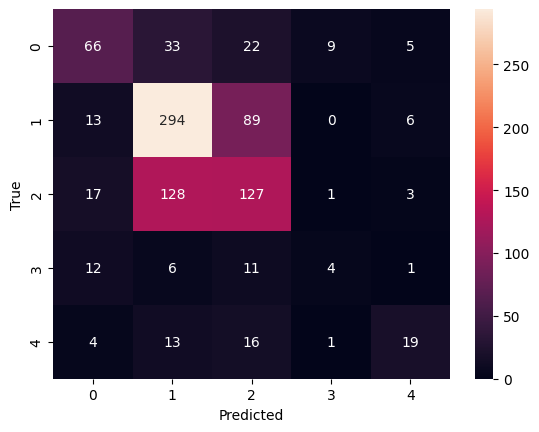

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Binary BOW

In [11]:
# Create a CountVectorizer object
binary_vectorizer = CountVectorizer(binary=True)

# Fit the vectorizer to the text data
binary_vectorizer.fit(data['text'])

# Transform the text data into a Bag of Words representation
binary_bow_representation = binary_vectorizer.transform(data['text'])

In [12]:
binary_test_bow_representation = binary_vectorizer.transform(test_data['text'])

In [13]:
from sklearn.linear_model import LogisticRegression
train_labels = data['label']
# Initialize and train the model
model = LogisticRegression(multi_class='multinomial')  # Set multi_class for multi-class problems
model.fit(binary_bow_representation, train_labels)

# Make predictions on the test data
predictions = model.predict(binary_test_bow_representation)

In [14]:
from sklearn.metrics import accuracy_score
true_labels = test_data['label'].tolist()
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5722222222222222


# TF_IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1500)

train_tf_idf=tfidf.fit_transform(data['text'])
# Use transform, not fit_transform, for test data to maintain consistency
test_tf_idf=tfidf.transform(test_data['text'])

In [16]:
from sklearn.linear_model import LogisticRegression
train_labels = data['label']
# Initialize and train the model
model = LogisticRegression(multi_class='multinomial')  # Set multi_class for multi-class problems
model.fit(train_tf_idf, train_labels)

# Make predictions on the test data
predictions = model.predict(test_tf_idf)

In [17]:
from sklearn.metrics import accuracy_score
true_labels = test_data['label'].tolist()
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5688888888888889


# Preprocessing

In [18]:
data['text']

0                 ধর্মীয় বইগুলোকে বলা হচ্ছে উগ্রবাদী বই। 
1       দাদা! নৌকা কিন্তু চলে না। এমাসে কম দিয়েছেন ১৯ ...
2       দম্ভ ও অহংকার পতনের মূল, জাতি দম্ভ দেখেছে এখন ...
3       বিএনপি জামাতের আগুন সন্ত্রাস। রাজধানীতে বাসে আ...
4       পুলিশকে ২০ দলের হুশিয়ারী বেশি বাড়াবাড়ি করলে তা...
                              ...                        
2695    যখন বাবা ফোন দেয় আর আমি বলি বাবা ফোন দিয়েছে আও...
2696           মাঝে মাঝে তব দেখা পাই, চিরদিন কেন পাই না। 
2697    বন্ধু যখন বলে, কালকে গার্লফ্রেন্ড নিয়ে ডেটিং এ...
2698     বিকল্প পথে ফেসবুক ব্যবহারকারীদের উপর কড়া নজর ...
2699     আমি একটা কচি মাল পটিয়েছি বলে পাবলিকের হিংসা হয়। 
Name: text, Length: 2700, dtype: object

In [19]:
!pip install nltk indic-nlp-library

  Using cached indic_nlp_library-0.92-py3-none-any.whl (40 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 11.9 MB/s eta 0:00:00


In [20]:
!pip install nltk indic-nlp-library pystemmer

  Using cached PyStemmer-2.2.0.1.tar.gz (303 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystemmer: filename=PyStemmer-2.2.0.1-cp310-cp310-linux_x86_64.whl size=579735 sha256=b65e0170300dcfc2840b1c1fa641f468c2fbfb1c05a47b566bd8d0856e341f7d
  Stored in directory: /root/.cache/pip/wheels/45/7d/2c/a7ebb8319e01acc5306fa1f8558bf24063d6cec2c02de330c9
Successfully built pystemmer


In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from indicnlp.tokenize import indic_tokenize
import string

# Ensure you have the NLTK stop words downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Define Bangla stop words
bangla_stopwords = set(stopwords.words('bengali'))

# Define punctuation to remove
punctuation = string.punctuation + "।" + "”" + "“"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
!pip install nltk indic-nlp-library

In [35]:
# This is a simple Bangla stemmer script from the bnltk repository

class BanglaStemmer:
    def __init__(self):
        self.suffixes = {
            1: ["া", "ি", "ী", "ো", "ে", "র", "রা", "রা", "রো", "রা"],
            2: ["তে", "রা", "কার", "রা", "য়", "এ", "রা", "র", "য়া", "তে", "ের"],
            3: ["গুলো", "রে", "রা", "ের", "তে", "ের", "ে", "রে"],
            4: ["করে", "গুলো", "র", "রা", "তে", "ের", "রা", "রে", "ের"]
        }

    def stem(self, word):
        for L in 4, 3, 2, 1:
            if len(word) > L + 1:
                for suf in self.suffixes[L]:
                    if word.endswith(suf):
                        return word[:-L]
        return word


In [37]:
stemmer = BanglaStemmer()

In [38]:
def clean_and_stem_tokens(tokens):
    cleaned_tokens = [word for word in tokens if word not in punctuation and word not in bangla_stopwords]
    stemmed_tokens = [stemmer.stem(word) for word in cleaned_tokens]
    return stemmed_tokens

In [39]:
from nltk.tokenize import word_tokenize
from indicnlp.tokenize import indic_tokenize

cleaned_texts = []
for text in data['text']:

  # Indic NLP word tokenization
  indic_words = list(indic_tokenize.trivial_tokenize(text))
  indic_words_cleaned = clean_and_stem_tokens(indic_words)
  print(text)
  print(indic_words_cleaned)
  new_text = ' '.join(indic_words_cleaned)
  print(new_text)
  cleaned_texts.append(new_text)

Streaming output truncated to the last 5000 lines.
['ভাই', 'গার্লফ্রেন্ড', 'মেয়', 'সম্পর', 'জেন', 'আসছ']
ভাই গার্লফ্রেন্ড মেয় সম্পর জেন আসছ
ব্যাস কাহিনি খতম, ভাল্লাগ্লে রিয়েক্ট দিয়েন। 
['ব্যাস', 'কাহিন', 'খতম', 'ভাল্লাগ', 'রিয়েক্ট', 'দিয়েন']
ব্যাস কাহিন খতম ভাল্লাগ রিয়েক্ট দিয়েন
মা জ¦র হয়েছে, বউ এনে দাও। হারামজাদা কি কইলি তুই?
['মা', 'জ¦', 'হয়', 'বউ', 'এন', 'দাও', 'হারামজাদ', 'কইল', 'তুই']
মা জ¦ হয় বউ এন দাও হারামজাদ কইল তুই
দাড়ি-টুপি দেখলে নির্যাতন, আওয়ামীলীগের হাতে পরে আজ এ কেমন দেশ? 
['দাড়', 'টুপ', 'দে', 'নির্যাতন', 'আওয়ামীল', 'হা', 'কেমন', 'দেশ']
দাড় টুপ দে নির্যাতন আওয়ামীল হা কেমন দেশ
মিথ্যে কথা, সব মিথ্যে কথা। এ আমি বিশ^াস করি না। 
['মিথ', 'কথ', 'মিথ', 'কথ', 'বিশ', 'াস']
মিথ কথ মিথ কথ বিশ াস
আমার মাথা নষ্ঠ। আমি এখন আমি কি করমু? 
['মাথ', 'নষ্ঠ', 'করমু']
মাথ নষ্ঠ করমু
পিছনে বন্ধুক ধরছিস কেন? পিছনে না তোর মাথায় ধরছি, তাহলে পাঁছায় খোঁচা লাগছে কেন? 
['পি', 'বন্ধুক', 'ধরছিস', 'পি', 'তো', 'মাথ', 'ধরছ', 'পাঁছ', 'খোঁচ', 'লা']
পি বন্ধুক ধরছিস পি তো মাথ ধরছ পাঁছ খোঁচ লা
স্কুলের টিচারকে য

In [45]:
data['text']=cleaned_texts

In [46]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data
vectorizer.fit(data['text'])

# Transform the text data into a Bag of Words representation
bow_representation = vectorizer.transform(data['text'])

In [47]:
# Load the test dataset
test_data = pd.read_csv('/content/drive/MyDrive/Bengali_hate_speech_dataset/test.csv')

# Transform the test data using the fitted vectorizer
test_bow_representation = vectorizer.transform(test_data['text'])

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression
train_labels = data['label']
# Initialize and train the model
model = LogisticRegression(multi_class='multinomial')  # Set multi_class for multi-class problems
model.fit(bow_representation, train_labels)

# Make predictions on the test data
predictions = model.predict(test_bow_representation)

In [50]:
from sklearn.metrics import accuracy_score
true_labels = test_data['label'].tolist()
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5422222222222223
